# Exploring Wolfsonian Data

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [129]:
df = pd.read_csv("../static/data/art_data.csv")
df.head()

,id,field_collection_type_library,field_identifier_library,title_library,field_alternative_title_library,artist_library,field_genre_library,field_date_library,field_place_published_library,field_description_long_library,...,artist_objects,field_genre_objects,field_date_objects,field_place_published_objects,field_classification,field_subject_objects,field_description_long_objects,field_credit_line,field_physical_form,field_extent_objects
0,1,Library,XM1997.301.5,The building of twelve thousand houses /,NaN,"Bouverie House : Ernest Benn Limited,; Walter...",Books.,1927,London :,History of the operations of the Industrial ho...,...,Mary Ireland __Artist __,FABRIC COLLAGE,1933,Great Britain,Textiles,Textiles/Textile Design,Framed triptych depicting a scene in a fabric ...,The Wolfsonian–Florida International Universit...,cloth |ribbon (material),"Inches __22 __43 __ __ __ __ __Dimensions, ove..."
1,2,Library,XB1991.1447,Will Bradley : -- including some examples of h...,including some examples of his later work /,"Vance Gerry/Weather Bird Press,; Apostol, Jan...",Pamphlets.,1976,Pasadena :,"""200 copies printed. Photostats of Bradley's l...",...,Sybil Andrews __Artist,PRINTING PLATE,1932,Great Britain,Mechanical and Electrical,Graphic Design,One of five linoleum blocks used to print the ...,The Wolfsonian–Florida International Universit...,linoleum,inches __10-7/8 __16-7/8
2,3,Library,XB1990.1501,Monumento ossario al Fante Italiano /,NaN,"publisher not identified,; Cirilli, Guido,; ...",Pamphlets.,approximately 1930].,[Place of publication not identified :,Title from cover.,...,Sybil Andrews __Artist,PRINTING PLATE,1932,Great Britain,Mechanical and Electrical,Graphic Design,One of five linoleum blocks used to print the ...,The Wolfsonian–Florida International Universit...,linoleum,inches __10-7/8 __16-7/8
3,4,Library,XB1990.605,Sherwin-Williams paint and color style guide :...,color suggestions for your home /,"Sherwin-Williams Company,",Manufacturers' catalogs.,c1942.,[Place of publication not identified] :,NaN,...,Sybil Andrews __Artist,PRINTING PLATE,1932,Great Britain,Mechanical and Electrical,Graphic Design,One of five linoleum blocks used to print the ...,The Wolfsonian–Florida International Universit...,linoleum,inches __10-7/8 __17-1/4
4,5,Library,TD1990.225.1,Glimpses of Polish architecture /,NaN,"Maxlove Publishing Co.,; Soltyânski, Roman.;...",Books.,[1943],London :,"Hardcover edition, black publisher's cloth ove...",...,Sybil Andrews __Artist,PRINTING PLATE,1932,Great Britain,Mechanical and Electrical,Graphic Design,One of five linoleum blocks used to print the ...,The Wolfsonian–Florida International Universit...,linoleum,inches __10-7/8 __16-7/8


## Looking Through Important Columns

### Field Genre

In [130]:
# Field Genre
print("Number of unique entries for 'field_genre_library':", df['field_genre_library'].nunique())
genre_counts = df['field_genre_library'].value_counts()
genre_counts


Number of unique entries for 'field_genre_library': 452


field_genre_library
Books.                  18743
Postcards.               7002
Exhibition catalogs.     3609
Periodicals.             2218
Pamphlets.               2162
                        ...  
Color woodcuts.             1
Advertisments.              1
Travel literature           1
Forms                       1
Kongress                    1
Name: count, Length: 452, dtype: int64

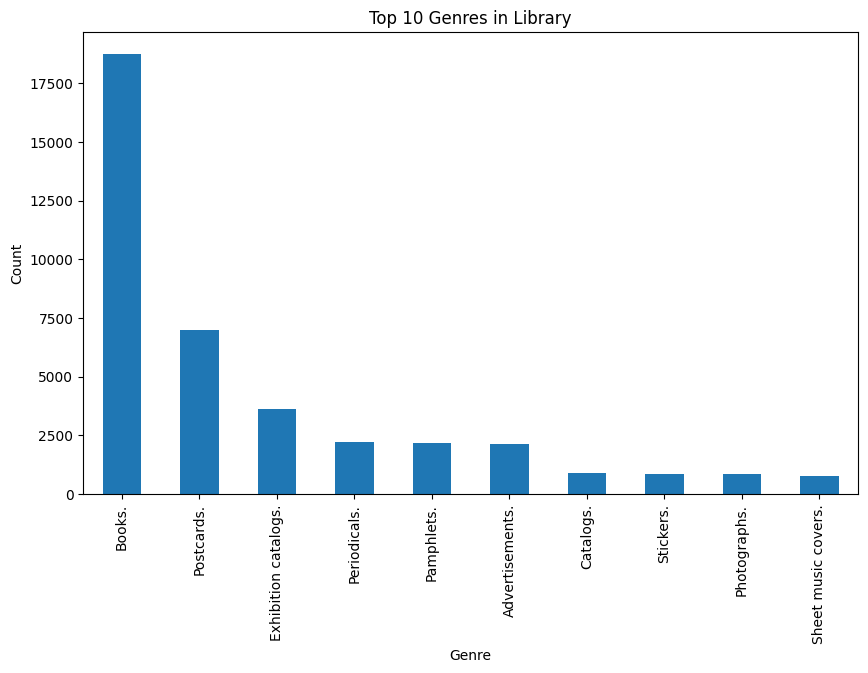

In [131]:
plt.figure(figsize=(10,6))
genre_counts.head(10).plot(kind='bar')
plt.title('Top 10 Genres in Library')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

### Field Year

In [132]:
# Field Dates
# Find 4 digit year first, then try 3 digit year, then 2, then 1
pattern = r'(\d{4}|\d{3}|\d{2}|\d{1})'
# Removes left and right empty spaces, extract first year found, and replace with NaN if that's not possible
filtered_dates = df['field_date_library'].str.strip().str.extract(pattern, expand=False)
date_counts = filtered_dates.value_counts()
date_counts

field_date_library
1939    1589
1915    1583
1931    1373
1930    1248
1935    1171
        ... 
55         1
46         1
1741       1
1814       1
39         1
Name: count, Length: 274, dtype: int64

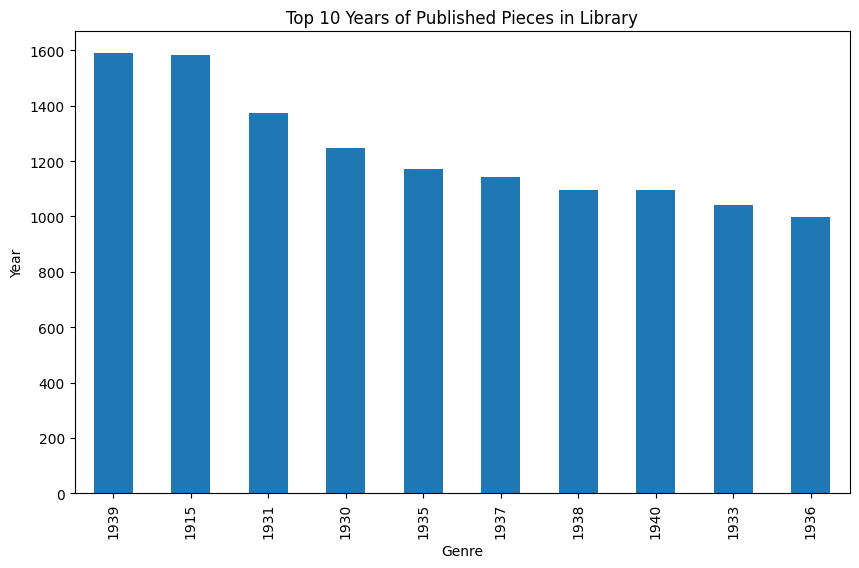

In [133]:
plt.figure(figsize=(10,6))
date_counts.head(10).plot(kind='bar')
plt.title('Top 10 Years of Published Pieces in Library')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()

### Location of Publication

In [134]:
df['field_place_published_objects'].value_counts().tail(50)

field_place_published_objects
United States __Provincetown __Massachusetts                                        1
Hungary __Karlin                                                                    1
Germany or Italy __ __ __Postcard version of this poster was printed in Germany.    1
Hungary __Kassa                                                                     1
United States __La Mirada __California                                              1
Austria __Oedenburg                                                                 1
United States __Fort Lauderdale __Florida                                           1
Italy __Salerno                                                                     1
Japan __Arita __ __Hizen                                                            1
Germany __Itzehoe                                                                   1
Africa                                                                              1
United States __Lowell _

In [135]:
import pandas as pd
import pycountry

countries = {country.name.lower() for country in pycountry.countries}

def extract_country(place_str):
    if not isinstance(place_str, str):
        return pd.NA
    tokens = [token.strip() for token in place_str.split("__")]
    return tokens[0]

df_clean = df[df['field_place_published_objects'].notna()]
place_published_count = df_clean["field_place_published_objects"].apply(extract_country).value_counts()
place_published_count.head(10)

field_place_published_objects
United States    12538
Austria           5933
France            5545
Germany           4486
Italy             3706
Great Britain     2561
Hungary           1468
Netherlands       1248
Japan              607
England            559
Name: count, dtype: int64

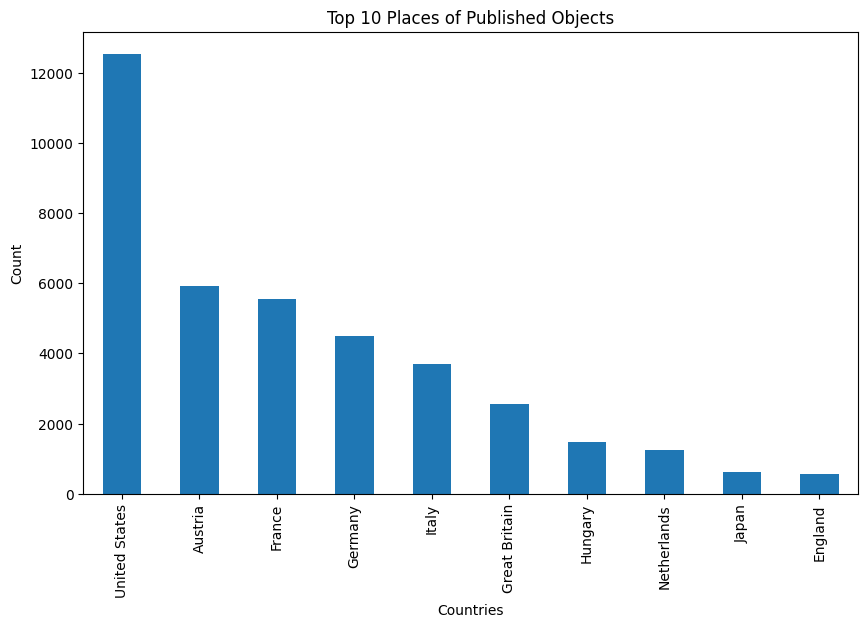

In [136]:
plt.figure(figsize=(10,6))
place_published_count.head(10).plot(kind='bar')
plt.title('Top 10 Places of Published Objects')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

### Field Classification

In [137]:
print("Number of unique entries for 'field_classification':", df['field_classification'].nunique())
classification_counts = df['field_classification'].value_counts()
classification_counts.head(10), classification_counts.tail(10)

Number of unique entries for 'field_classification': 57


(field_classification
 Fine Arts                    23357
 Decorative Arts               9591
 Textiles                      5394
 Photographic Materials        4668
 Architecture                  3305
 Medallic Arts                 3102
 Mechanical and Electrical     1427
 Furniture                      887
 Personal Effects               755
 Souvenir                       376
 Name: count, dtype: int64,
 field_classification
 Souvenir --Medallic Arts                                                                                                      1
 Decorative Arts --Mechanical and Electrical                                                                                   1
 Tools & Equipment for Materials --Food Service Tools & Equipment --Eating & Drinking Utensils --Eating Pick --Seafood Pick    1
 Personal Objects --Clothing Accessories & Components --Textiles                                                               1
 Furnishings --Household Accessories --Decorative Fu

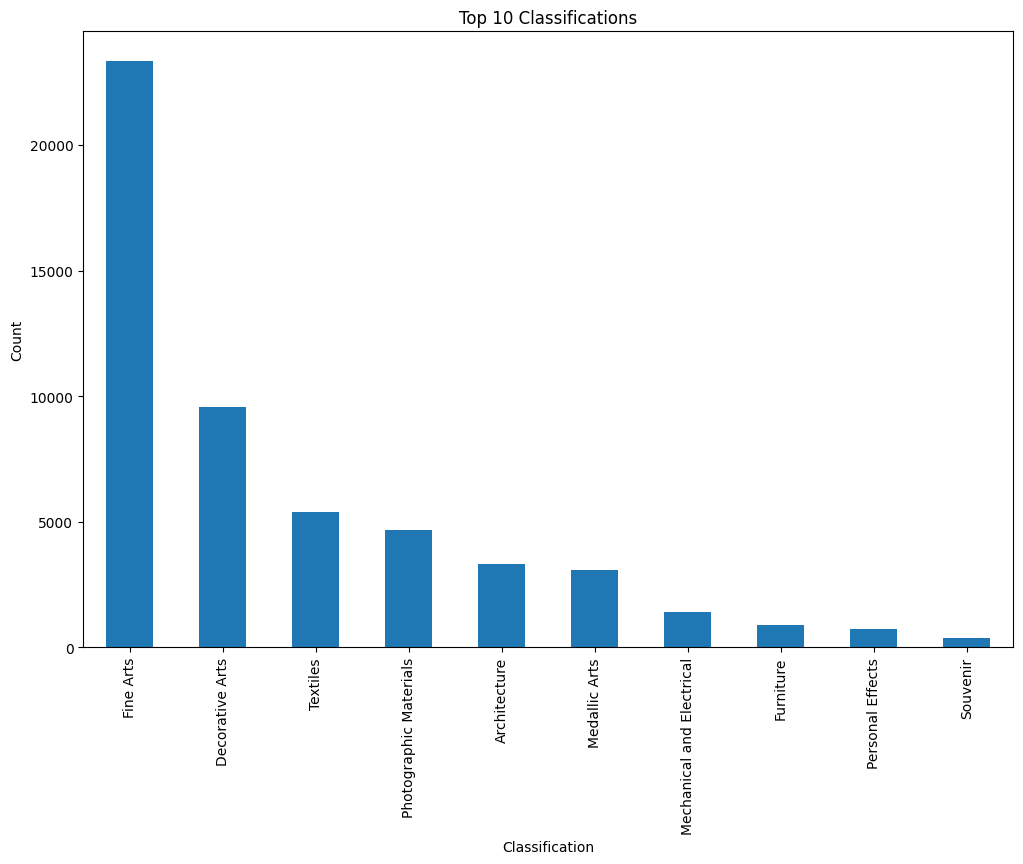

In [138]:
plt.figure(figsize=(12,8))
classification_counts.head(10).plot(kind='bar')
plt.title('Top 10 Classifications')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

### Field Physical Form

In [139]:
df['field_physical_form'].dropna().value_counts()

field_physical_form
ink --paper (fiber product)                                                                                                             6158
ink |paper (fiber product)                                                                                                              4801
emulsion |paper (fiber product)                                                                                                         3847
bronze (metal)                                                                                                                          2247
graphite (mineral) |paper (fiber product)                                                                                               1493
                                                                                                                                        ... 
copper (metal) |brass (alloy) |wood (plant material) |cloth |metal |ink |graphite (mineral)                                           

### Field Classification & Country

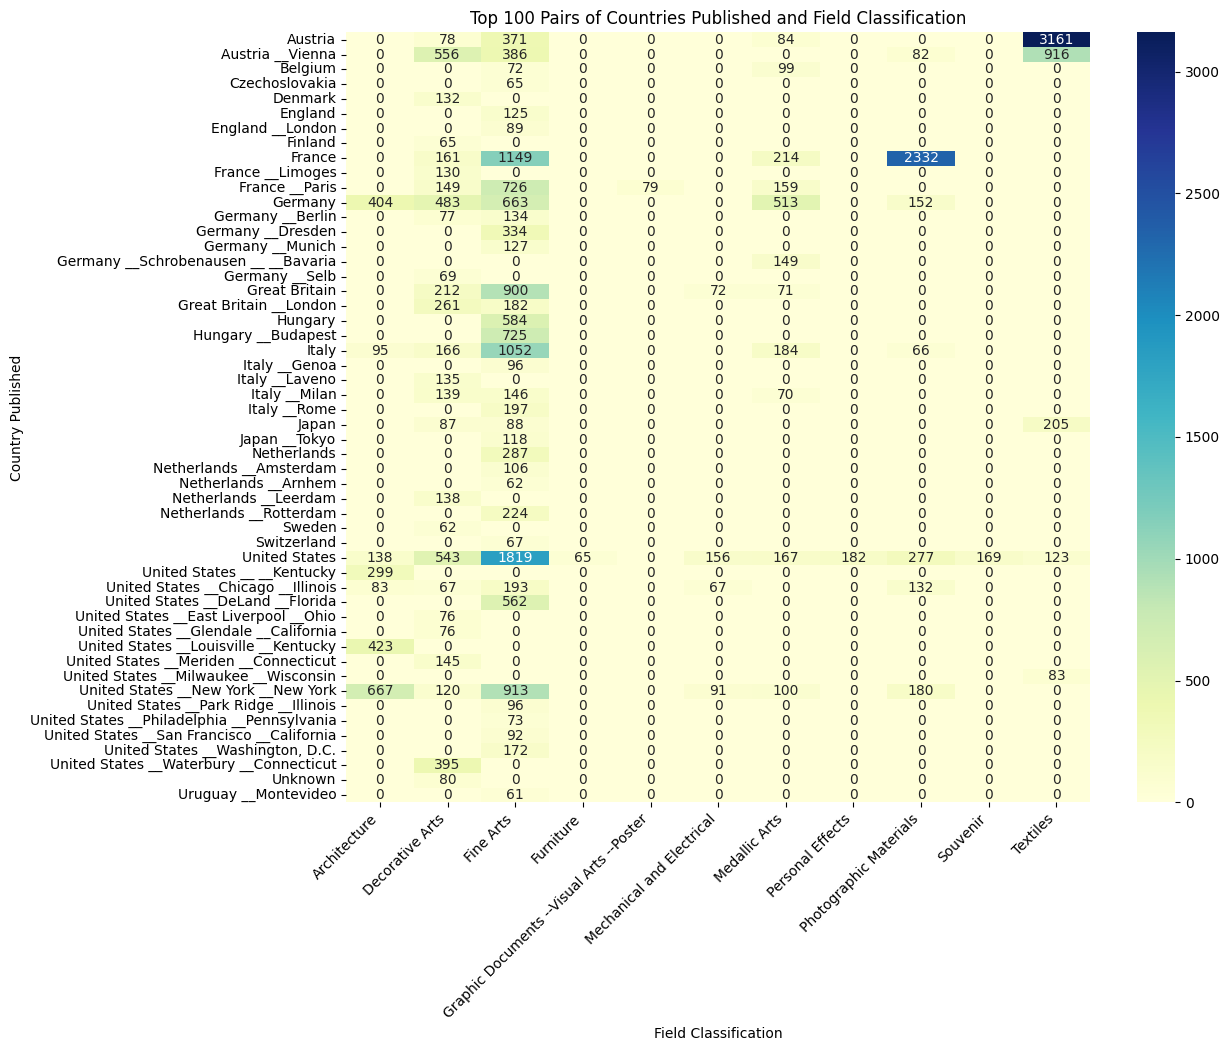

In [140]:
df_pairs = df_clean[['field_place_published_objects', 'field_classification']]
df_pairs = df_pairs.dropna()

pair_counts = df_pairs.groupby(['field_place_published_objects', 'field_classification']).size().reset_index(name='count')
top_pairs = pair_counts.sort_values(by='count', ascending=False).head(100)
heatmap_data = top_pairs.pivot(index='field_place_published_objects', columns='field_classification', values='count').fillna(0)

plt.figure(figsize=(12, 10))
heatmap_data = heatmap_data.astype(int)
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Top 100 Pairs of Countries Published and Field Classification')
plt.xlabel('Field Classification')
plt.ylabel('Country Published')
plt.xticks(rotation=45, ha='right')
plt.show()